# - Set the environment

In [15]:
import pandas as pd
import numpy as np
import os
from PIL import Image, ImageDraw
import ffmpeg

In [7]:
ENV_DIR = '../kaggle_nflsafety'
DATA_DIR = f'{ENV_DIR}/data'

# - Get the data

In [8]:
image_labels = pd.read_csv(f'{DATA_DIR}/image_labels.csv')
sample_submission = pd.read_csv(f'{DATA_DIR}/sample_submission.csv')

test_baseline_helmets = pd.read_csv(f'{DATA_DIR}/test_baseline_helmets.csv')
test_player_tracking = pd.read_csv(f'{DATA_DIR}/test_player_tracking.csv')

train_baseline_helmets = pd.read_csv(f'{DATA_DIR}/train_baseline_helmets.csv')
train_labels = pd.read_csv(f'{DATA_DIR}/train_labels.csv')
train_player_tracking = pd.read_csv(f'{DATA_DIR}/train_player_tracking.csv')

# - Get a frame

In [10]:
def get_frame_from_video(video_path, frame):
    video_path = f"{DATA_DIR}/train/{video_path}"
    frame = frame - 1
    
    !ffmpeg \
        -hide_banner \
        -loglevel fatal \
        -nostats \
        -i $video_path -vf "select=eq(n\,$frame)" -vframes 1 frame.png
    
    img = Image.open('frame.png')
    os.remove('frame.png')
    return img

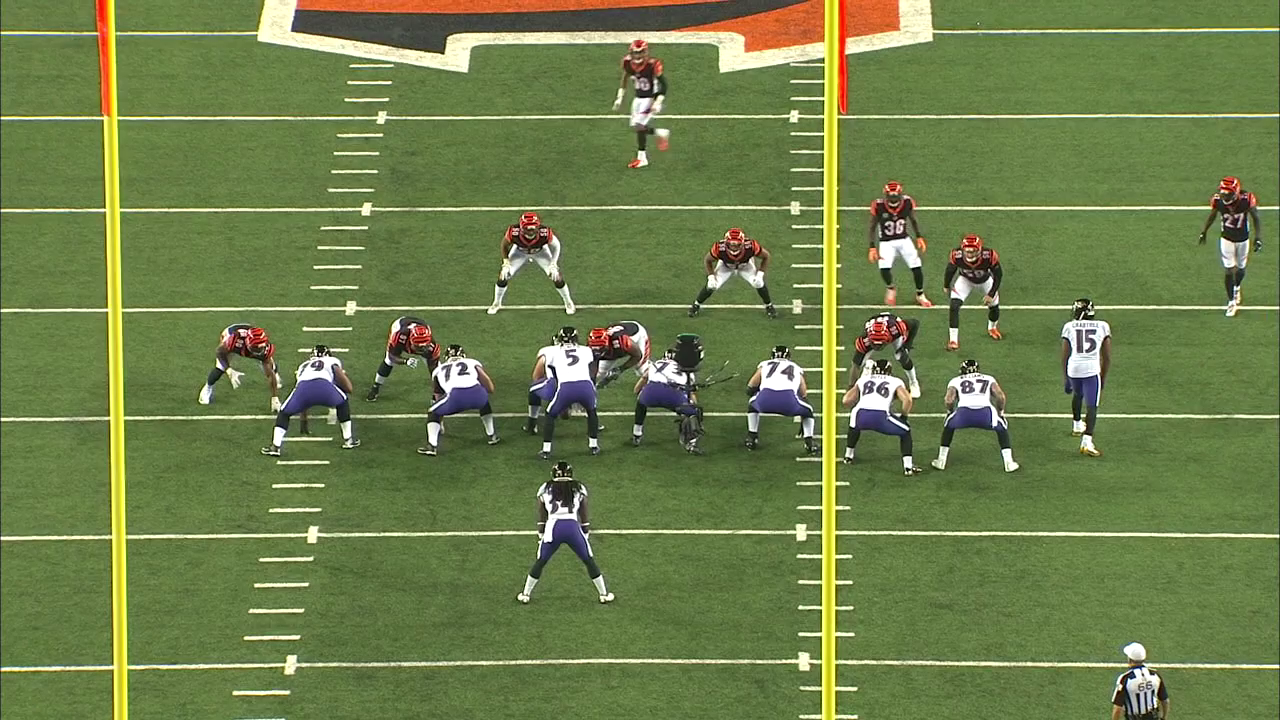

In [11]:
video_path = '57583_000082_Endzone.mp4'
frame = 1
get_frame_from_video(video_path, frame)

# - Draw helmets boxes

In [12]:
def draw_rect(image, bbox_df):
    new_image = image.copy()
    draw = ImageDraw.Draw(new_image)
    for _, (left, width, top, height) in bbox_df[['left', 'width', 'top', 'height']].iterrows():
        draw.rectangle(((left, top), (left + width, top + height)), outline=(255, 0, 0), width=2)
    
    return new_image

In [13]:
def frame_bbox(df, video_frame):
    video_name = '_'.join(video_frame.split('_')[:3]) + '.mp4'
    frame = int(video_frame.split('_')[-1])
    
    image = get_frame_from_video(video_name, frame)
    bbox_df = df.query('video_frame == @video_frame')
    
    bbox_image = draw_rect(image, bbox_df)
    
    return bbox_image

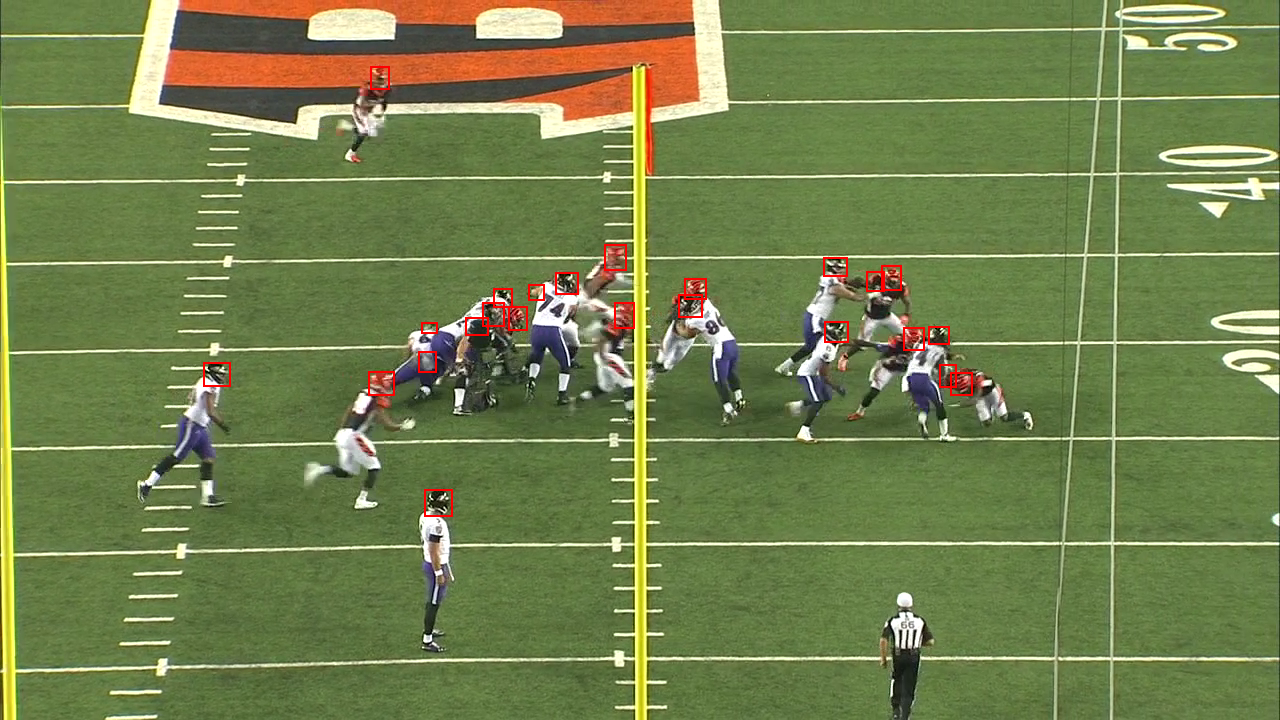

In [21]:
frame_bbox(train_baseline_helmets, '57583_000082_Endzone_200')